In [ ]:
!pip install keras-tcn
!pip install keras-tcn --no-dependencies

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

import keras 
import pandas as pd


from keras.models import Sequential
from keras.layers import Dense 

from keras.layers import Dropout

from keras.layers import LSTM

from keras.layers import *


from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping


from tcn import TCN, tcn_full_summary

In [ ]:
df=pd.read_csv("GOOG.csv")
print("Number of rows and columns:", df.shape)
df.head(5)
training_set = df.iloc[:1100, 4:5].values

test_set = df.iloc[1100:, 4:5].values
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

Number of rows and columns: (1503, 7)


DATA WINDOW 60

In [ ]:

X_train60 = []
y_train60 = []
for i in range(60, 1100):
    X_train60.append(training_set_scaled[i-60:i, 0])
    y_train60.append(training_set_scaled[i, 0])
X_train60, y_train60 = np.array(X_train60), np.array(y_train60)
X_train60 = np.reshape(X_train60, (X_train60.shape[0], X_train60.shape[1], 1))

X_train60.shape

(1040, 60, 1)

TEST DATA WINDOW 60

In [ ]:

dataset_train = df.iloc[:1100, 4:5]
dataset_test = df.iloc[1100:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)


463

In [ ]:
X_test60 = []
for i in range(60, 463):
    X_test60.append(inputs[i-60:i, 0])
X_test60 = np.array(X_test60)
X_test60 = np.reshape(X_test60, (X_test60.shape[0], X_test60.shape[1], 1))
X_test60.shape

(403, 60, 1)

DATA WINDOW 1

In [ ]:

X_train1 = []
y_train1 = []
for i in range(1, 800):
    X_train1.append(training_set_scaled[i-1:i, 0])
    y_train1.append(training_set_scaled[i, 0])
X_train1, y_train1 = np.array(X_train1), np.array(y_train1)
X_train1 = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1], 1))
X_train1.shape

(799, 1, 1)

TEST DATA WINDOW 1

In [ ]:

dataset_train = df.iloc[:1100, 4:5]
dataset_test = df.iloc[1100:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 1:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)

404

In [ ]:

X_test1 = []
for i in range(1, 404):
    X_test1.append(inputs[i-1:i, 0])
X_test1 = np.array(X_test1)
X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], 1))
print(X_test1.shape)

(403, 1, 1)


DATA WINDOW 30

In [ ]:

X_train30 = []
y_train30 = []
for i in range(30, 800):
    X_train30.append(training_set_scaled[i-30:i, 0])
    y_train30.append(training_set_scaled[i, 0])
X_train30, y_train30 = np.array(X_train30), np.array(y_train30)
X_train30 = np.reshape(X_train30, (X_train30.shape[0], X_train30.shape[1], 1))
X_train30.shape

(770, 30, 1)

TEST DATA WINDOW 30

In [ ]:

dataset_train = df.iloc[:1100, 4:5]
dataset_test = df.iloc[1100:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)

433

In [ ]:

X_test30 = []
for i in range(30, 433):
    X_test30.append(inputs[i-30:i, 0])
X_test30 = np.array(X_test30)
X_test30 = np.reshape(X_test30, (X_test30.shape[0], X_test30.shape[1], 1))
print(X_test30.shape)

(403, 30, 1)


DATA WINDOW 90

In [ ]:

X_train90 = []
y_train90 = []
for i in range(90, 800):
    X_train90.append(training_set_scaled[i-90:i, 0])
    y_train90.append(training_set_scaled[i, 0])
X_train90, y_train90 = np.array(X_train90), np.array(y_train90)
X_train90 = np.reshape(X_train90, (X_train90.shape[0], X_train90.shape[1], 1))
X_train90.shape

(710, 90, 1)

TEST DATA WINDOW 90

In [ ]:

dataset_train = df.iloc[:1100, 4:5]
dataset_test = df.iloc[1100:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 90:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)

493

In [ ]:

X_test90 = []
for i in range(90, 493):
    X_test90.append(inputs[i-90:i, 0])
X_test90 = np.array(X_test90)
X_test90 = np.reshape(X_test90, (X_test90.shape[0], X_test90.shape[1], 1))
print(X_test90.shape)

(403, 90, 1)


GRU 1

In [ ]:
model = Sequential()
model.add(GRU(units = 700,  input_shape = (X_train1.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train1, y_train1, epochs = 30, batch_size = 32)

Epoch 1/30
25/25 [==============================] - 2s 4ms/step - loss: 0.0421
Epoch 2/30
25/25 [==============================] - 0s 4ms/step - loss: 0.0106
Epoch 3/30
25/25 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 4/30
25/25 [==============================] - 0s 3ms/step - loss: 5.7312e-04
Epoch 5/30
25/25 [==============================] - 0s 3ms/step - loss: 2.4327e-04
Epoch 6/30
25/25 [==============================] - 0s 3ms/step - loss: 2.5134e-04
Epoch 7/30
25/25 [==============================] - 0s 3ms/step - loss: 2.3716e-04
Epoch 8/30
25/25 [==============================] - 0s 3ms/step - loss: 2.4854e-04
Epoch 9/30
25/25 [==============================] - 0s 3ms/step - loss: 2.4485e-04
Epoch 10/30
25/25 [==============================] - 0s 3ms/step - loss: 2.5690e-04
Epoch 11/30
25/25 [==============================] - 0s 3ms/step - loss: 2.6831e-04
Epoch 12/30
25/25 [==============================] - 0s 3ms/step - loss: 2.4302e-04
Epoch 13/30
2

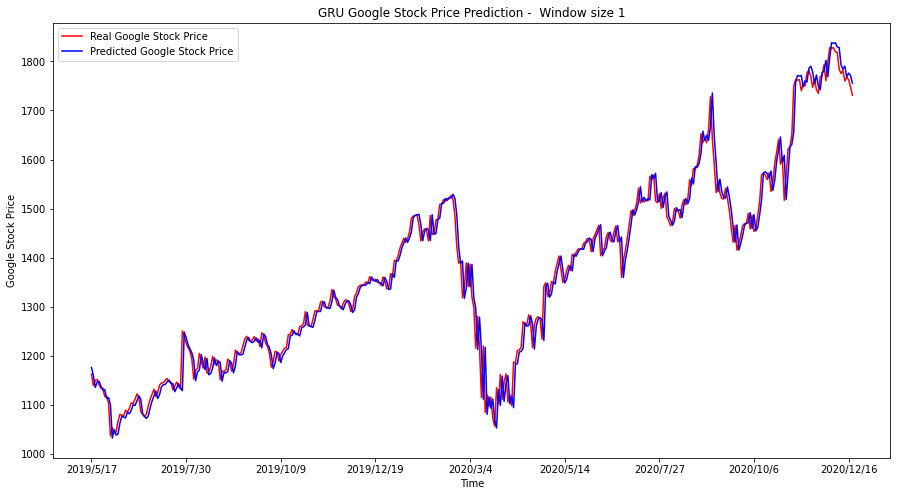

In [ ]:
predicted_stock_price = model.predict(X_test1)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real Google Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('GRU Google Stock Price Prediction -  Window size 1')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

19.4125924954831

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

28.229996339984435

TCN 1

In [ ]:
np.random.seed(1)
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=4, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (X_train1.shape[1], 1)))
#model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train1, y_train1, epochs = 100, batch_size = 32)

Epoch 1/100
25/25 [==============================] - 2s 7ms/step - loss: 0.0544
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0141
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0085
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0068
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0056
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0039
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0035
Epoch 8/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 9/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0026
Epoch 10/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0021
Epoch 11/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 12/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 13/100
25/25 [=================

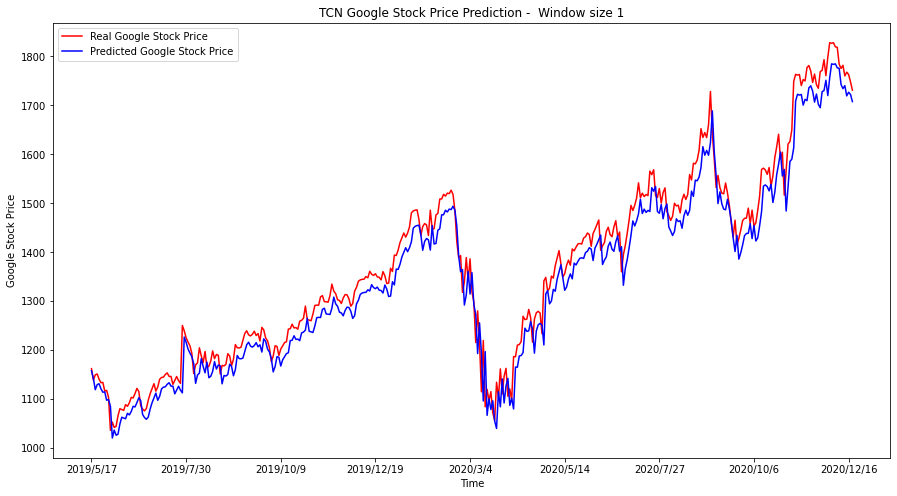

In [ ]:
predicted_stock_price = model.predict(X_test1)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real Google Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('TCN Google Stock Price Prediction -  Window size 1')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

33.90757644535127

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

40.38739649096171

GRU 30

In [ ]:
model = Sequential()
model.add(GRU(units = 700, input_shape = (X_train30.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train30, y_train30, epochs = 30, batch_size = 32)

Epoch 1/30
25/25 [==============================] - 2s 10ms/step - loss: 0.0168
Epoch 2/30
25/25 [==============================] - 0s 8ms/step - loss: 9.6531e-04
Epoch 3/30
25/25 [==============================] - 0s 7ms/step - loss: 5.1457e-04
Epoch 4/30
25/25 [==============================] - 0s 7ms/step - loss: 4.7416e-04
Epoch 5/30
25/25 [==============================] - 0s 7ms/step - loss: 4.3383e-04
Epoch 6/30
25/25 [==============================] - 0s 7ms/step - loss: 4.1031e-04
Epoch 7/30
25/25 [==============================] - 0s 7ms/step - loss: 4.2257e-04
Epoch 8/30
25/25 [==============================] - 0s 7ms/step - loss: 3.9514e-04
Epoch 9/30
25/25 [==============================] - 0s 7ms/step - loss: 4.1070e-04
Epoch 10/30
25/25 [==============================] - 0s 7ms/step - loss: 4.8685e-04
Epoch 11/30
25/25 [==============================] - 0s 7ms/step - loss: 4.0996e-04
Epoch 12/30
25/25 [==============================] - 0s 7ms/step - loss: 3.9459e-04
Epoc

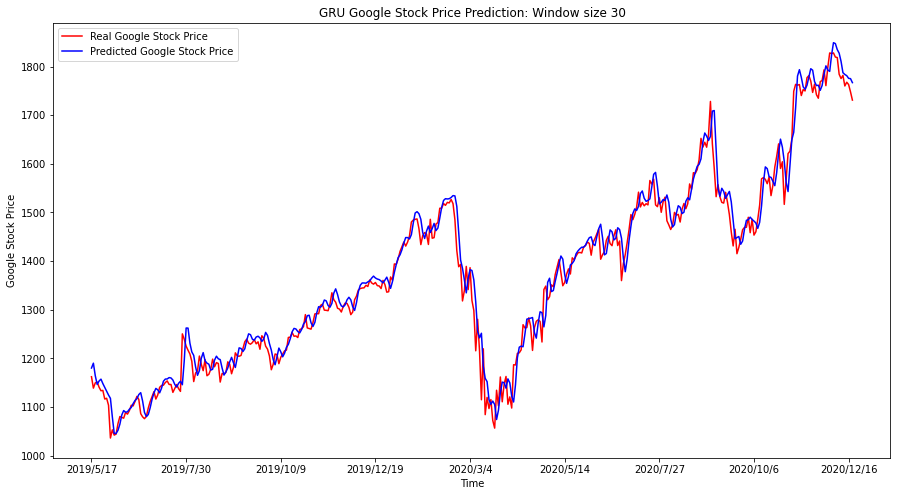

In [ ]:
predicted_stock_price = model.predict(X_test30)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real Google Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('GRU Google Stock Price Prediction: Window size 30')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

21.553391661096466

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

29.85749265555473

TCN 30

In [ ]:
np.random.seed(1)
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=4, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (X_train30.shape[1], 1)))
#model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train30, y_train30, epochs = 100, batch_size = 32)

Epoch 1/100
25/25 [==============================] - 2s 13ms/step - loss: 0.6913
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0869
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0514
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0319
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0290
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0198
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0219
Epoch 8/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0159
Epoch 9/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0109
Epoch 10/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0113
Epoch 11/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0100
Epoch 12/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0128
Epoch 13/100
25/25 [================

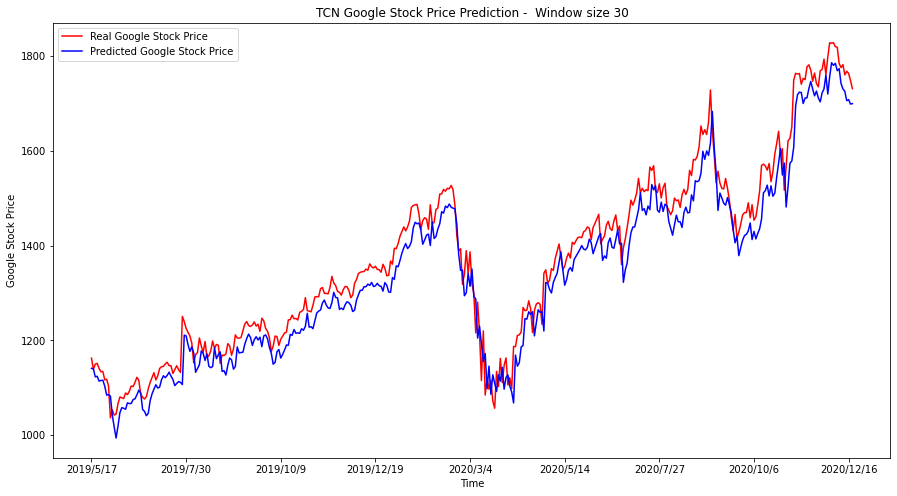

In [ ]:
predicted_stock_price = model.predict(X_test30)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real Google Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('TCN Google Stock Price Prediction -  Window size 30')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

39.01575300187073

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

44.95608660529806

GRU 60

In [ ]:
model = Sequential()
model.add(GRU(units = 700, input_shape = (X_train60.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train60, y_train60, epochs = 30, batch_size = 32)

Epoch 1/30
33/33 [==============================] - 2s 14ms/step - loss: 0.0241
Epoch 2/30
33/33 [==============================] - 0s 11ms/step - loss: 9.7328e-04
Epoch 3/30
33/33 [==============================] - 0s 11ms/step - loss: 7.1778e-04
Epoch 4/30
33/33 [==============================] - 0s 11ms/step - loss: 6.3171e-04
Epoch 5/30
33/33 [==============================] - 0s 11ms/step - loss: 7.2034e-04
Epoch 6/30
33/33 [==============================] - 0s 11ms/step - loss: 7.2357e-04
Epoch 7/30
33/33 [==============================] - 0s 11ms/step - loss: 7.1107e-04
Epoch 8/30
33/33 [==============================] - 0s 11ms/step - loss: 6.1087e-04
Epoch 9/30
33/33 [==============================] - 0s 11ms/step - loss: 5.8800e-04
Epoch 10/30
33/33 [==============================] - 0s 11ms/step - loss: 6.5586e-04
Epoch 11/30
33/33 [==============================] - 0s 11ms/step - loss: 6.3024e-04
Epoch 12/30
33/33 [==============================] - 0s 11ms/step - loss: 6.34

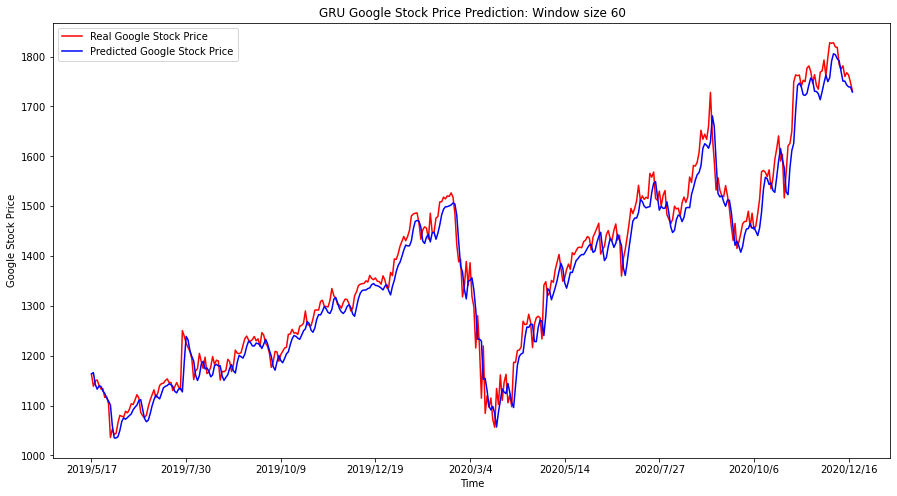

In [ ]:
predicted_stock_price = model.predict(X_test60)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real Google Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('GRU Google Stock Price Prediction: Window size 60')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

24.728261798115696

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

32.03704498631042

TCN 60

In [ ]:
np.random.seed(1)
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=4, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (X_train60.shape[1], 1)))
#model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train60, y_train60, epochs = 100, batch_size = 32)

Epoch 1/100
33/33 [==============================] - 2s 9ms/step - loss: 4.2491
Epoch 2/100
33/33 [==============================] - 0s 7ms/step - loss: 0.2672
Epoch 3/100
33/33 [==============================] - 0s 7ms/step - loss: 0.1659
Epoch 4/100
33/33 [==============================] - 0s 7ms/step - loss: 0.1089
Epoch 5/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0798
Epoch 6/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0610
Epoch 7/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0503
Epoch 8/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0430
Epoch 9/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0389
Epoch 10/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0325
Epoch 11/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0321
Epoch 12/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0252
Epoch 13/100
33/33 [=================

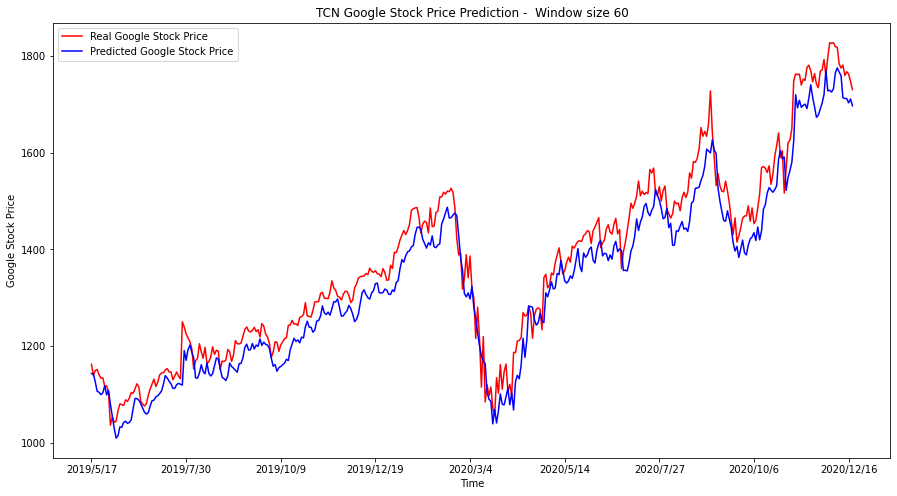

In [ ]:
predicted_stock_price = model.predict(X_test60)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real Google Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('TCN Google Stock Price Prediction -  Window size 60')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price,y)
abse

43.963103593575525

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

50.5344351809924

GRU 90

In [ ]:
model = Sequential()
model.add(GRU(units = 700, input_shape = (X_train90.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train90, y_train90, epochs = 30, batch_size = 32)

Epoch 1/30
23/23 [==============================] - 2s 20ms/step - loss: 0.0192
Epoch 2/30
23/23 [==============================] - 0s 16ms/step - loss: 0.0014
Epoch 3/30
23/23 [==============================] - 0s 16ms/step - loss: 4.6216e-04
Epoch 4/30
23/23 [==============================] - 0s 16ms/step - loss: 4.3015e-04
Epoch 5/30
23/23 [==============================] - 0s 16ms/step - loss: 4.2742e-04
Epoch 6/30
23/23 [==============================] - 0s 16ms/step - loss: 4.3575e-04
Epoch 7/30
23/23 [==============================] - 0s 16ms/step - loss: 5.0055e-04
Epoch 8/30
23/23 [==============================] - 0s 16ms/step - loss: 5.3440e-04
Epoch 9/30
23/23 [==============================] - 0s 16ms/step - loss: 4.6404e-04
Epoch 10/30
23/23 [==============================] - 0s 16ms/step - loss: 4.3085e-04
Epoch 11/30
23/23 [==============================] - 0s 16ms/step - loss: 3.8381e-04
Epoch 12/30
23/23 [==============================] - 0s 16ms/step - loss: 5.2911e-

In [ ]:
predicted_stock_price = model.predict(X_test90)



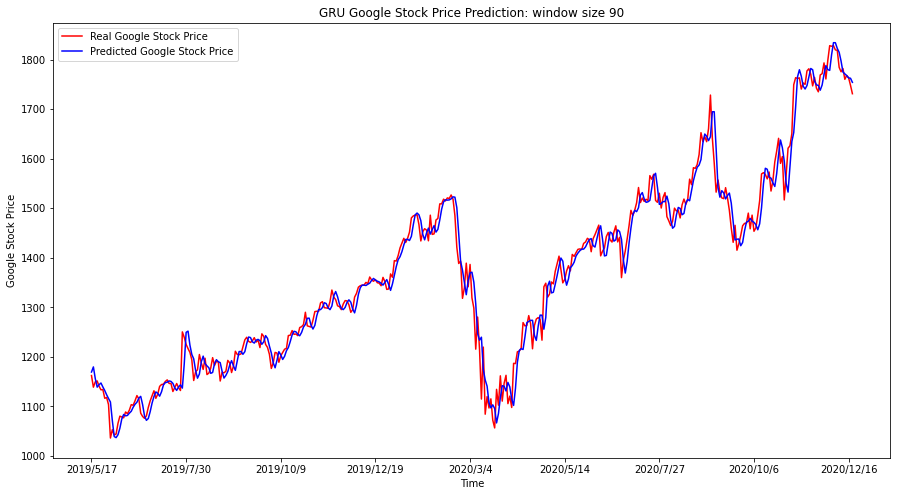

In [ ]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real Google Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('GRU Google Stock Price Prediction: window size 90')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

20.584209750387718

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))

In [ ]:
rmse

28.670898137956016

TCN 90


In [ ]:
np.random.seed(1)
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=5, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (X_train90.shape[1], 1)))
#model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train90, y_train90, epochs = 100, batch_size = 32)

Epoch 1/100
23/23 [==============================] - 3s 17ms/step - loss: 4.9039
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 0.2552
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 0.1187
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0887
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0673
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0568
Epoch 7/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0447
Epoch 8/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0492
Epoch 9/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0389
Epoch 10/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0332
Epoch 11/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0283
Epoch 12/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0240
Epoch 13/100
23/23 [================

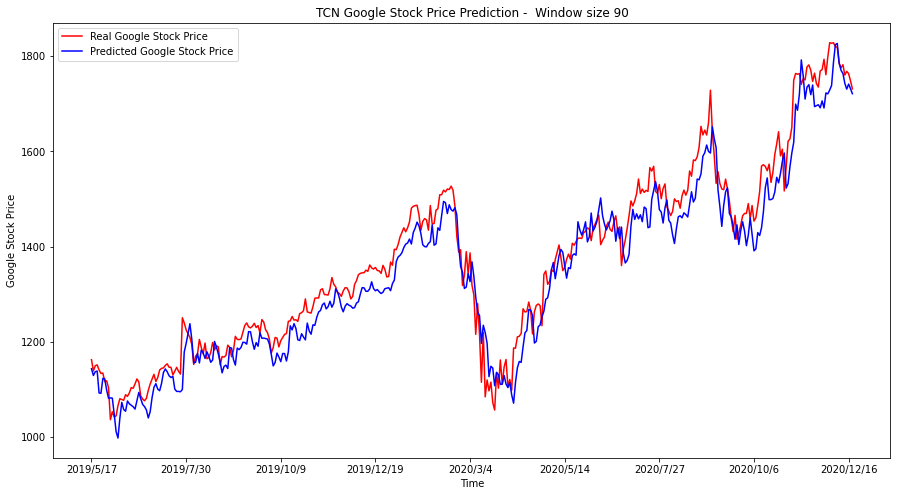

In [ ]:
predicted_stock_price = model.predict(X_test90)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real Google Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('TCN Google Stock Price Prediction -  Window size 90')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

38.12872073847511

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

46.343715725205016